# Imports

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy import stats
import seaborn as sns

# Loading data

In [2]:
df_raw_A = {
'visits_A': [24186, 22240, 21915, 24046, 21620, 21651, 22624, 25476, 24232,
26996, 24418, 26906, 21262, 20247, 21377, 21237, 26087, 25624,
24754, 23289, 21968, 21819, 20614, 18778, 23902, 21089, 19599,
16136, 19584, 16925, 23675, 26319, 20691, 21535, 25220, 22885,
24725, 25090, 26551, 24389, 23229, 24359, 25755, 25270, 23617,
21501, 24459, 23413, 21180, 19490, 28164, 19612, 21427, 27168,
25076, 25819, 26386, 26784, 23879, 24669, 22962, 24776, 23591,
20815, 22421, 25605, 24855, 20280, 22752, 716],
'clicks_A': [1642, 1660, 1728, 1878, 1234, 1320, 1826, 2768, 2940, 3016, 2060,
3072, 1984, 1544, 1496, 1372, 2278, 2314, 2284, 1452, 1810, 2162,
1410, 1294, 2096, 1366, 1262, 1022, 1444, 1114, 1688, 2362, 1210,
1518, 3646, 1954, 2146, 2100, 2794, 2064, 1886, 1732, 2878, 1700,
1968, 1430, 1254, 1642, 1558, 1148, 1282, 1264, 1568, 2254, 1416,
1778, 2072, 2248, 1682, 1152, 1540, 1270, 1848, 1928, 1464, 1746,
2222, 1184, 1170, 62]
}

df_raw_B = {
'visits_B': [24909, 22986, 22953, 24896, 22284, 22563, 23196, 26238, 24871,
27869, 25301, 27779, 22008, 21020, 22037, 22006, 27070, 26169,
25518, 24043, 22593, 22195, 21015, 19337, 24448, 21765, 19933,
16672, 20329, 17638, 24427, 27232, 21468, 21966, 25987, 23607,
25487, 25926, 27237, 25163, 23965, 25037, 26214, 25999, 24272,
22336, 25271, 24220, 22014, 20195, 29069, 20320, 22058, 28055,
25992, 26678, 26949, 27701, 24951, 25561, 23766, 25646, 24677,
21441, 23269, 26265, 25563, 20869, 23276, 707],
'clicks_B': [1714, 1778, 1848, 2008, 1270, 1372, 1868, 2872, 3014, 3110, 2094,
3278, 1982, 1648, 1500, 1362, 2582, 2326, 2386, 1540, 1892, 2160,
1476, 1336, 2108, 1418, 1252, 1078, 1550, 1156, 1860, 2288, 1228,
1602, 3766, 2000, 2320, 2166, 3010, 2010, 1928, 1890, 2960, 1716,
1950, 1534, 1418, 1796, 1522, 1224, 1346, 1350, 1534, 2436, 1404,
1790, 2180, 2574, 1824, 1162, 1586, 1390, 1950, 2020, 1484, 1818,
2348, 1280, 1136, 60]
}

In [3]:
df = pd.concat([(pd.DataFrame(df_raw_A)),(pd.DataFrame(df_raw_B))],axis=1)

df['acc_visits_A'] = np.cumsum(df['visits_A'])
df['acc_clicks_A'] = np.cumsum(df['clicks_A'])
df['acc_visits_B'] = np.cumsum(df['visits_B'])
df['acc_clicks_B'] = np.cumsum(df['clicks_B'])
df['conversion'] = (df['clicks_A'] + df['clicks_B'])/(df['visits_A'] + df['visits_B'])


# df.head()

In [4]:
#Calculo do valor do Z
numerador = (df['acc_clicks_B']/df['acc_visits_B']) - (df['acc_clicks_A']/df['acc_visits_A'])
denominador = np.sqrt(((df['conversion'])*(1-df['conversion']))*((1/df['acc_visits_A'])+(1/df['acc_visits_B'])))

df['z'] = numerador/denominador

In [5]:
df['ctr_A'] = (df['acc_clicks_A']/df['acc_visits_A'])
df['ctr_B'] = (df['acc_clicks_B']/df['acc_visits_B'])

df['acc_ctr_A'] = np.cumsum(df['ctr_A'])
df['acc_ctr_B'] = np.cumsum(df['ctr_B'])

df

,visits_A,clicks_A,visits_B,clicks_B,acc_visits_A,acc_clicks_A,acc_visits_B,acc_clicks_B,conversion,z,ctr_A,ctr_B,acc_ctr_A,acc_ctr_B
0,24186,1642,24909,1714,24186,1642,24909,1714,0.068357,0.403823,0.067891,0.068810,0.067891,0.068810
1,22240,1660,22986,1778,46426,3302,47895,3492,0.076018,1.034435,0.071124,0.072909,0.139014,0.141720
2,21915,1728,22953,1848,68341,5030,70848,5340,0.079700,1.219713,0.073601,0.075373,0.212616,0.217093
3,24046,1878,24896,2008,92387,6908,95744,7348,0.079400,1.583106,0.074772,0.076746,0.287388,0.293839
4,21620,1234,22284,1270,114007,8142,118028,8618,0.057034,1.661355,0.071417,0.073017,0.358805,0.366855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,25605,1746,26265,1818,1533108,120038,1582062,125014,0.068710,2.520243,0.078297,0.079020,5.368062,5.415863
66,24855,2222,25563,2348,1557963,122260,1607625,127362,0.090642,2.321909,0.078474,0.079224,5.446536,5.495086
67,20280,1184,20869,1280,1578243,123444,1628494,128642,0.059880,2.936969,0.078216,0.078994,5.524752,5.574081
68,22752,1170,23276,1136,1600995,124614,1651770,129778,0.050100,3.032542,0.077835,0.078569,5.602588,5.652650


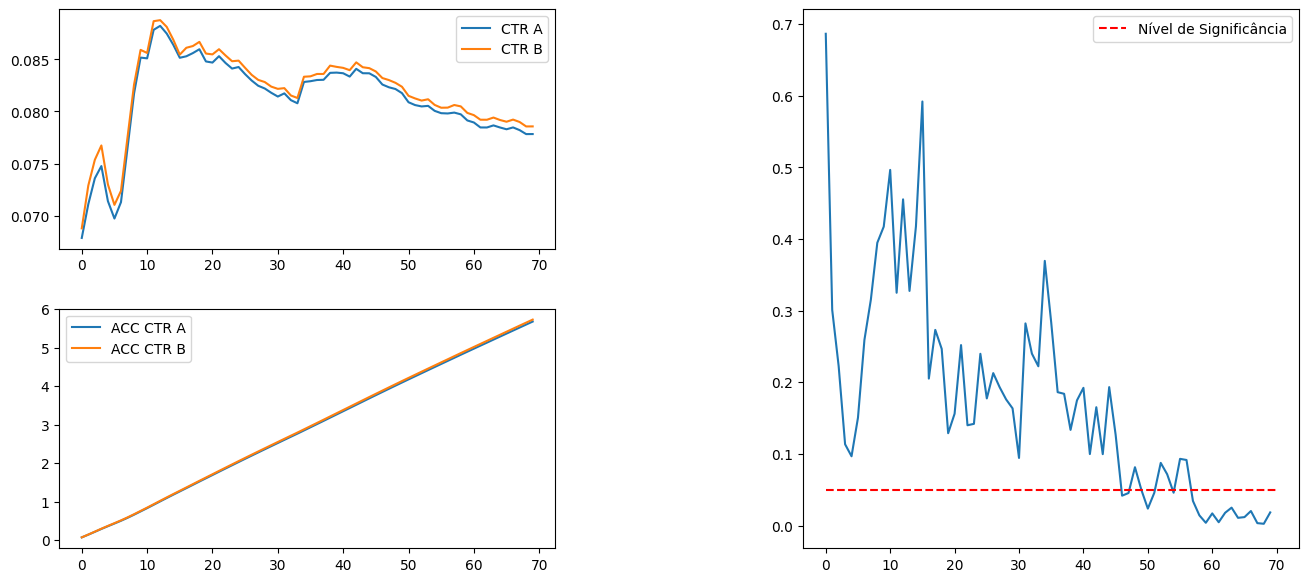

In [6]:
f = plt.figure(figsize=(16,7))
gs0 = gridspec.GridSpec(2,2,figure=f, wspace=0.5, hspace=0.25)

ax1 = f.add_subplot(gs0[:1,:1])
ax2 = f.add_subplot(gs0[1:,:1])
ax3 = f.add_subplot(gs0[:,1:])

ax1.plot(df['ctr_A'],label='CTR A');
ax1.plot(df['ctr_B'],label='CTR B');
ax1.legend();

ax2.plot(df['acc_ctr_A'],label='ACC CTR A');
ax2.plot(df['acc_ctr_B'],label='ACC CTR B');
ax2.legend();

ax3.plot(2*(1 - stats.norm.cdf(df['z'])))
ax3.hlines(0.05,0,70, color='red',label='Nível de Significância',linestyle='--');
ax3.legend();

#Qual o momento que eu decido que uma é melhor que a outra?

#Se as conversões são muito próximas, eu preciso de muitos dados para dizer que uma é melhor que a outra
#Se as conversões são muito distoantes, em poucos dias é possível concluir que uma é melhor do que a outra

#Até o dia 58, não era possível tirar uma conclusão, depois desse dia há amostras o suficiente para isso

# A/B Bayesiano

In [7]:
df1 = df.copy()

In [8]:
df1.head()

,visits_A,clicks_A,visits_B,clicks_B,acc_visits_A,acc_clicks_A,acc_visits_B,acc_clicks_B,conversion,z,ctr_A,ctr_B,acc_ctr_A,acc_ctr_B
0,24186,1642,24909,1714,24186,1642,24909,1714,0.068357,0.403823,0.067891,0.068810,0.067891,0.068810
1,22240,1660,22986,1778,46426,3302,47895,3492,0.076018,1.034435,0.071124,0.072909,0.139014,0.141720
2,21915,1728,22953,1848,68341,5030,70848,5340,0.079700,1.219713,0.073601,0.075373,0.212616,0.217093
3,24046,1878,24896,2008,92387,6908,95744,7348,0.079400,1.583106,0.074772,0.076746,0.287388,0.293839
4,21620,1234,22284,1270,114007,8142,118028,8618,0.057034,1.661355,0.071417,0.073017,0.358805,0.366855


In [54]:
N_mc = 100000
proba_b_better_a = []
proba_a_better_b = []
expected_loss_a = []
expected_loss_b = []
for day in range(len(df1)):

  u_a,var_a = stats.beta.stats( a = 1 + df1.loc[day,'acc_clicks_A'],
                                b = 1 + (df1.loc[day,'acc_visits_A'] - df1.loc[day,'acc_clicks_A']),
                                moments = 'mv'
                                )

  u_b,var_b = stats.beta.stats( a = 1 + df1.loc[day,'acc_clicks_B'],
                                b = 1 + (df1.loc[day,'acc_visits_B'] - df1.loc[day,'acc_clicks_B']),
                                moments = 'mv'
                                )


  #Amostras da distribuição Normal A
  x_a = np.random.normal(loc = u_a,
                                scale = 1.25*np.sqrt(var_a),
                                size = N_mc)

  #Amostras da distribuição Normal A
  x_b = np.random.normal(loc = u_b,
                                scale = 1.25*np.sqrt(var_b),
                                size = N_mc)

  #Beta distribution function of page A
  fa = stats.beta.pdf(x_a,
                      a = 1 + df1.loc[day,'acc_clicks_A'],
                      b = 1 + (df1.loc[day,'acc_visits_A'] - df1.loc[day,'acc_clicks_A'])
                      )


  #Beta distribution function of page B
  fb = stats.beta.pdf(x_b,
                      a = 1 + df1.loc[day,'acc_clicks_B'],
                      b = 1 + (df1.loc[day,'acc_visits_B'] - df1.loc[day,'acc_clicks_B'])
                      )

  #Normal distribution function of page A
  ga = stats.norm.pdf(x_a,
                      loc = u_a,
                      scale = 1.25*np.sqrt(var_a)
                      )

  #Normal distribution function of page A
  gb = stats.norm.pdf(x_b,
                      loc = u_b,
                      scale = 1.25*np.sqrt(var_b)
                      )

  #Bera/Normal
  y = (fa*fb)/(ga*gb)

  #Somente valores onde o B é maior que A
  yb = y[x_b >= x_a]
  ya = y[x_a >= x_b]

  #Probabilidade de B ser melhor do que A
  p_b = (1 / N_mc) * np.sum(yb)
  p_a = (1 / N_mc) * np.sum(ya)

  proba_b_better_a.append(p_b)
  proba_a_better_b.append(p_a)

  #Erro ao assumir B melhor do que A
  expected_loss_A = (1 / N_mc) * np.sum(((x_b - x_a)*y)[x_b >= x_a])
  expected_loss_B = (1 / N_mc) * np.sum(((x_a - x_b)*y)[x_a >= x_b])

  expected_loss_a.append(expected_loss_A)
  expected_loss_b.append(expected_loss_B)

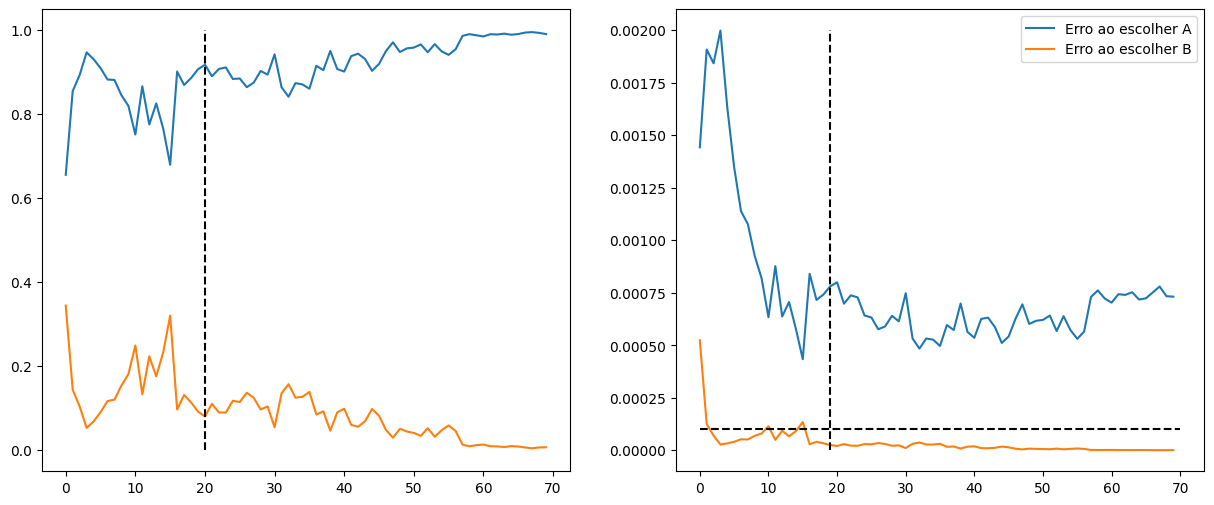

In [58]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
# axs[0].set_ylim(0.5,1)
axs[0].plot(proba_b_better_a,label='Probabildiade de B ser maior que A');
axs[0].plot(proba_a_better_b,label='Probabildiade de A ser maior que B');
axs[0].vlines(20,0,1.0, color='black', linestyle='--');

#Risco esperado, qual o número de dias onde não tem mais chance do jogo virar para a outra variável?
axs[1].plot(expected_loss_a,label='Erro ao escolher A');
axs[1].plot(expected_loss_b,label='Erro ao escolher B');
axs[1].hlines(0.0001, 0,70,color='black', linestyle='--');
axs[1].vlines(19,0,0.002, color='black', linestyle='--');
plt.legend();

In [ ]:
#A partir do dia 20, vemos que a probabilidade de B ser maior que o A é maior que 90%
#E o risco associado a essa escolha é menor do que 0.1% (treshold escolhido), no dia 16
#Como o risco após 3 dias continuou menor que o treshold
#O experimento pode parar com a decisão de que B é maior que A, utilizando menos dias que o frequentista
#No frequentista, a decisão só poderia ser tomada quando a quantidade e amostra é o suficiente para chegar no nível de significância
#No bayesiano a decisão é feita antes devido a probabilidade ínfima da virada de jogo